In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
boba = pd.read_csv("Bubble_Tea_Sales.csv")

In [3]:
boba.head()

,Customer ID,Customer Name,Location Code,Order Location,Qty,Short Order Description,Price per Drink,Order Price,Category,Discount,Total Cost
0,CUST0001,Ava Hoang,1,Saddle Ridge,1,"Matcha Latte, Grass Jelly, 30%, 0%",7.75,7.75,A,0.095,7.01375
1,CUST0002,Liam Pham,1,Saddle Ridge,1,"Mango GT, Lychee, 70%, 100%",6.75,6.75,A,0.095,6.10875
2,CUST0003,Aiden Wong,1,Saddle Ridge,3,"Matcha Latte, Grass Jelly, 30%, 0%",7.75,23.25,C,0.115,20.57625
3,CUST0004,Liam Kim,1,Saddle Ridge,5,"Oolong MT, Pearl, 50%, 30%",6.25,31.25,D,0.125,27.34375
4,CUST0005,Lucas Choi,1,Saddle Ridge,6,"Mango GT, Lychee, 70%, 100%",6.75,40.50,D,0.125,35.43750


In [4]:
boba.shape

(100, 11)

In [5]:
boba.drop_duplicates().shape

(100, 11)

In [6]:
boba.dtypes

Customer ID                 object
Customer Name               object
Location Code                int64
Order Location              object
Qty                          int64
Short Order Description     object
Price per Drink            float64
Order Price                float64
Category                    object
Discount                   float64
Total Cost                 float64
dtype: object

In [7]:
# Top 5 Customers ordered the most drinks
boba.sort_values(by='Qty', ascending=False).head()

,Customer ID,Customer Name,Location Code,Order Location,Qty,Short Order Description,Price per Drink,Order Price,Category,Discount,Total Cost
5,CUST0006,Ethan Tran,1,Saddle Ridge,7,"Straw Yog Slush, Pop Boba, 0%, 30%",7.50,52.5,D,0.125,45.9375
42,CUST0043,Olivia Hoang,4,Country Hills,6,"Matcha Latte, Grass Jelly, 30%, 0%",7.75,46.5,D,0.125,40.6875
67,CUST0068,Ethan Kim,3,Beltline,6,"Oolong MT, Pearl, 50%, 30%",6.25,37.5,D,0.125,32.8125
48,CUST0049,Aiden Chen,1,Saddle Ridge,6,"Straw Yog Slush, Pop Boba, 0%, 30%",7.50,45.0,D,0.125,39.3750
49,CUST0050,Aiden Lee,1,Saddle Ridge,6,"Straw Yog Slush, Pop Boba, 0%, 30%",7.50,45.0,D,0.125,39.3750


In [8]:
# Most expensive drink(s)
boba.sort_values(by='Price per Drink', ascending=False).head()

,Customer ID,Customer Name,Location Code,Order Location,Qty,Short Order Description,Price per Drink,Order Price,Category,Discount,Total Cost
72,CUST0073,Luna Lin,1,Saddle Ridge,3,"Brown Sugar, Pudding, 0%, 30%",8.25,24.75,C,0.115,21.90375
78,CUST0079,Luna Wong,2,Panorama Hills,1,"Avocado, Crystal Boba, 30%",8.00,8.00,A,0.095,7.24000
76,CUST0077,Emma Hoang,1,Saddle Ridge,2,"Avocado, Crystal Boba, 30%",8.00,16.00,B,0.105,14.32000
86,CUST0087,Ethan Pham,2,Panorama Hills,2,"Avocado, Crystal Boba, 30%",8.00,16.00,B,0.105,14.32000
36,CUST0037,Emma Pham,2,Panorama Hills,2,"Avocado, Crystal Boba, 30%",8.00,16.00,B,0.105,14.32000


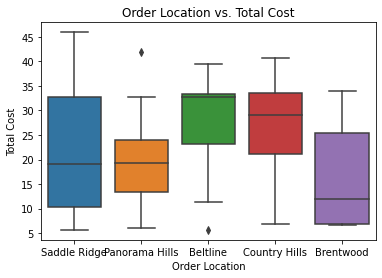

In [9]:
# Boxplot 1: Order Location vs. Total Cost
boxplot1 = sns.boxplot(data=boba,
                      x='Order Location',
                      y= 'Total Cost')
boxplot1.set_title('Order Location vs. Total Cost')  # shows how Total Cost varies across locations.

plt.show(boxplot1)

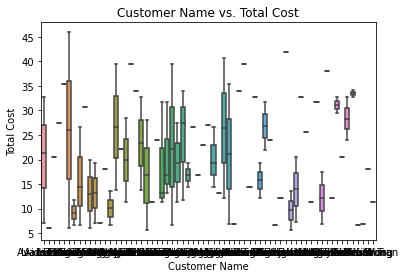

In [10]:
# Boxplot 2: Customer Name vs. Order Price
boxplot2 = sns.boxplot(data=boba,
                      x='Customer Name',
                      y= 'Total Cost')
boxplot2.set_title('Customer Name vs. Total Cost')  # shows how much different customers spent per order.

plt.show(boxplot2)

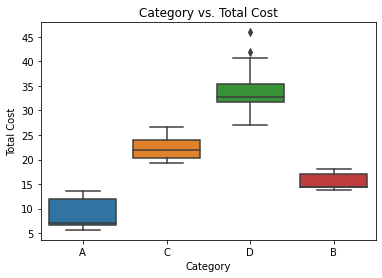

In [11]:
# Boxplot 3: Category vs. Total Cost
boxplot3 = sns.boxplot(data=boba,
                      x='Category',
                      y= 'Total Cost')
boxplot3.set_title('Category vs. Total Cost')

plt.show(boxplot3)

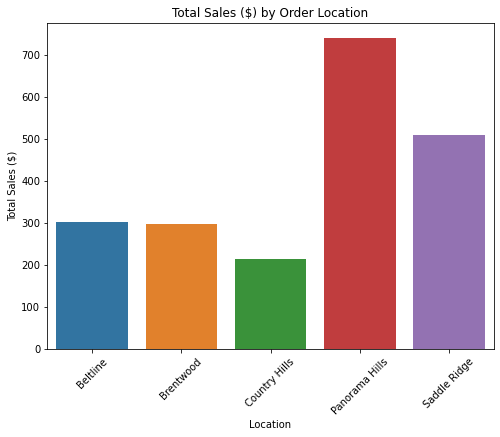

In [12]:
# Bar plot: Order Location vs. Total Cost

# Group by 'Order Location' and sum of 'Total Cost'
sales_by_location = boba.groupby('Order Location')['Total Cost'].sum().reset_index()

# Plot
plt.figure(figsize=(8,6))
sns.barplot(data=sales_by_location,
           x= 'Order Location',
           y= 'Total Cost')

plt.xlabel('Location')
plt.ylabel('Total Sales ($)')
plt.title('Total Sales ($) by Order Location')
plt.xticks(rotation=45)

plt.show()

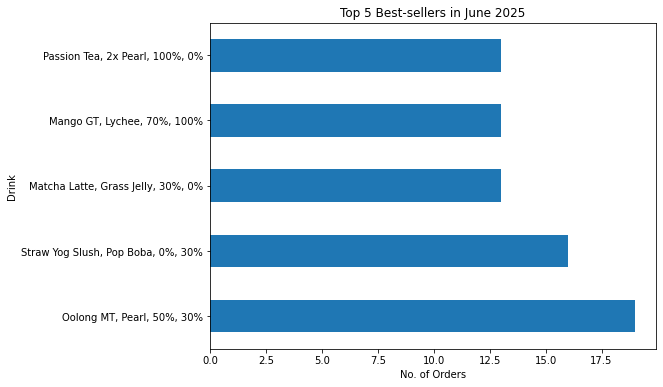

In [16]:
# Bar plot: Top 5 Best-sellers 

# Count the occurrences of each drink type
best_sellers = boba['Short Order Description'].value_counts().head()

# Plot
plt.figure(figsize=(8,6))
best_sellers.plot(kind='barh')

plt.xlabel('No. of Orders')
plt.ylabel('Drink')
plt.title('Top 5 Best-sellers in June 2025')

plt.show()

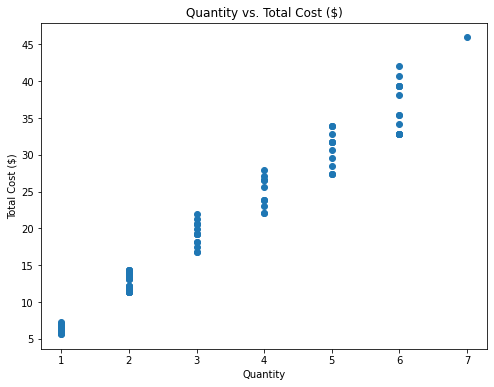

In [17]:
# Scatter plot (Qty vs. Total Cost)

plt.figure(figsize=(8,6))
plt.scatter(boba['Qty'], boba['Total Cost'])

plt.xlabel('Quantity')
plt.ylabel('Total Cost ($)')
plt.title('Quantity vs. Total Cost ($)')

plt.show()

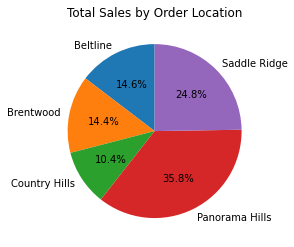

In [22]:
# PIE chart (Location vs. Total Cost)
sales_by_location = boba.groupby('Order Location')['Total Cost'].sum()

# Create the pie chart
plt.figure(figsize=(4, 4))
plt.pie(
    sales_by_location,
    labels= sales_by_location.index,
    autopct= '%1.1f%%',
    startangle= 90
)

plt.title('Total Sales by Order Location')
plt.show()

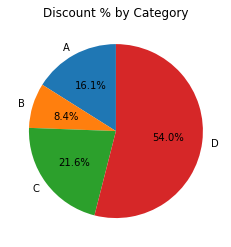

In [23]:
# PIE Chart: Category vs. Total Cost
discount_by_category = boba.groupby('Category')['Total Cost'].sum()

# Create the pie chart
plt.figure(figsize=(4, 4))
plt.pie(
    discount_by_category,
    labels= discount_by_category.index,
    autopct= '%1.1f%%',
    startangle= 90
)

plt.title('Discount % by Category')
plt.show()

In [ ]:
# END.